Imports

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

Loading the data

In [36]:
data_to_load = './Datasets/kryptonite-9-X.npy'
labels_to_load = './Datasets/kryptonite-9-y.npy'

X = np.load(data_to_load)
y = np.load(labels_to_load)


(18000, 9)


Splitting and normalizing the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initializing model

In [33]:
def create_model(num_features):
    model = tf.keras.Sequential([
        Input(shape=(num_features,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Training model


In [34]:
# training hyperparameters
num_epochs = 50
batch_size = 32
validation_split = 0.2
num_splits = 5

kfolds = KFold(n_splits=num_splits)
fold_counter = 1
accuracies = []

for train_index, validation_index in kfolds.split(X):
    X_train, X_val = X[train_index], X[validation_index]
    y_train, y_val = y[train_index], y[validation_index]
    
    model = create_model(X_train.shape[1])
    trained_model = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split, verbose=1)

    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold_counter} - Validation Accuracy: {val_accuracy}")
    accuracies.append(val_accuracy)
    fold_counter += 1

average_accuracy = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy}")

Epoch 1/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5223 - loss: 0.6918 - val_accuracy: 0.6750 - val_loss: 0.6408
Epoch 2/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.7963 - loss: 0.4958 - val_accuracy: 0.9514 - val_loss: 0.2092
Epoch 3/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9493 - loss: 0.2060 - val_accuracy: 0.9493 - val_loss: 0.2051
Epoch 4/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.9524 - loss: 0.1900 - val_accuracy: 0.9594 - val_loss: 0.1848
Epoch 5/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.9537 - loss: 0.1877 - val_accuracy: 0.9462 - val_loss: 0.2189
Epoch 6/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.9532 - loss: 0.1858 - val_accuracy: 0.9569 - val_loss: 0.1852
Epoch 7/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.9565 - loss: 0.1753 - val_accuracy: 0.9528 - val_loss: 0.1895
Epoch 8/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.9550 - loss: 0.1744 - va

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
Accuracy: 0.60
Precision: 0.58
Recall: 0.73


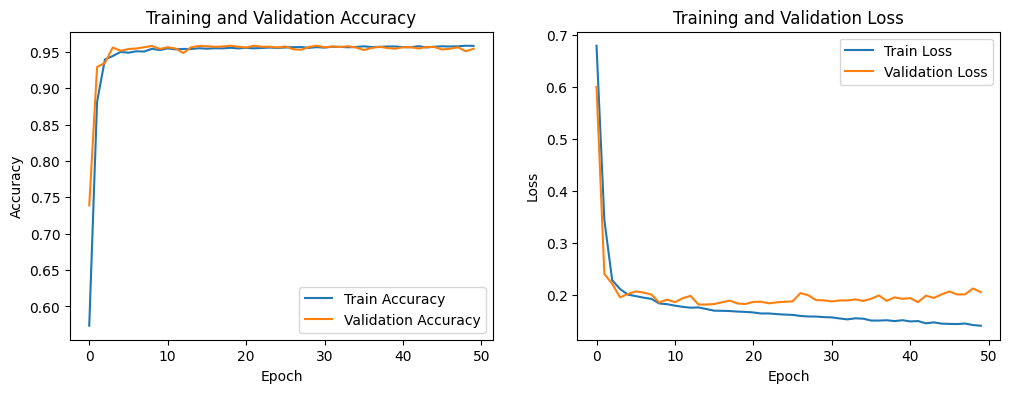

In [35]:
y_prediction_probabilities = model.predict(X_test).flatten()
y_preds = (y_prediction_probabilities > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'], label='Train Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'], label='Train Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()